In [529]:
import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

### Read CSV

In [530]:
answerDf = pd.read_csv('../data/metadata/answer_metadata_task_3_4.csv', index_col=0)
trainTaskDf = pd.read_csv('../data/train_data/train_task_3_4.csv', index_col=0)
subjectDf = pd.read_csv('../data/metadata/subject_metadata.csv', index_col=0)
questionDf = pd.read_csv('../data/metadata/question_metadata_task_3_4.csv', index_col=0)
studentDf = pd.read_csv('../data/metadata/student_metadata_task_3_4.csv', index_col=0)
qualityDf = pd.read_csv('../data/test_data/quality_response_remapped_public.csv')

In [531]:
answerDf.head()

,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
AnswerId,,,,,
1451945,2019-10-30 14:34:00.000,NaN,4,32,52562.0
45325,2020-01-06 18:53:00.000,75.0,185,66,52562.0
687013,2020-01-18 10:52:00.000,NaN,235,64,52562.0
91254,2020-02-29 17:25:00.000,NaN,194,97,52562.0
1225855,2020-03-06 15:07:00.000,NaN,95,115,52562.0


In [532]:
questionDf.head()

,SubjectId
QuestionId,
684,"[3, 71, 98, 209]"
87,"[3, 71, 98, 209]"
679,"[3, 71, 98, 209]"
685,"[3, 71, 98, 209]"
222,"[3, 71, 98, 209]"


In [533]:
studentDf.head()

,Gender,DateOfBirth,PremiumPupil
UserId,,,
3837,2,2007-10-01 00:00:00.000,0.0
207,0,NaN,NaN
3581,2,2008-03-01 00:00:00.000,0.0
6028,2,2008-01-01 00:00:00.000,0.0
1451,0,NaN,NaN


In [534]:
trainTaskDf.reset_index(inplace=True)

In [535]:
questionConcatDf = pd.merge(trainTaskDf, answerDf, on='AnswerId')

In [536]:
questionConcatDf.drop(['DateAnswered','GroupId','QuizId','SchemeOfWorkId'],axis=1,inplace=True)

### Get Confidence Data

In [537]:
UserDf = questionConcatDf.groupby('UserId').mean()

In [538]:
UserDf['CorrectConf'] = questionConcatDf[questionConcatDf['IsCorrect'] == 1].groupby('UserId')['Confidence'].mean()

In [539]:
UserDf['WrongConf'] = questionConcatDf[questionConcatDf['IsCorrect'] == 0].groupby('UserId')['Confidence'].mean()

In [540]:
UserDf.drop(['QuestionId','AnswerId','CorrectAnswer','AnswerValue'],axis=1,inplace=True)

In [541]:
UserDf

,IsCorrect,Confidence,CorrectConf,WrongConf
UserId,,,,
1,0.419355,35.483871,37.500000,32.692308
2,0.366667,83.333333,100.000000,75.000000
3,1.000000,89.285714,89.285714,NaN
4,0.681416,65.000000,71.250000,52.500000
5,0.606805,66.836735,71.551724,60.000000
...,...,...,...,...
6143,0.738462,70.512821,71.551724,67.500000
6144,0.326531,66.666667,41.666667,91.666667
6145,0.494118,NaN,NaN,NaN


In [542]:
UserDf.corr()

,IsCorrect,Confidence,CorrectConf,WrongConf
IsCorrect,1.000000,0.354147,0.276276,0.228009
Confidence,0.354147,1.000000,0.898381,0.877116
CorrectConf,0.276276,0.898381,1.000000,0.628638
WrongConf,0.228009,0.877116,0.628638,1.000000


In [543]:
questionConcatDf

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,Confidence
0,898,2111,280203,1,2,2,NaN
1,767,3062,55638,1,3,3,25.0
2,165,1156,386475,1,2,2,NaN
3,490,1653,997498,1,4,4,NaN
4,298,3912,578636,1,3,3,NaN
...,...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2,NaN
1382723,707,2549,584230,0,2,1,NaN
1382724,840,5901,1138956,1,1,1,NaN
1382725,794,3854,1151183,0,1,3,NaN


In [544]:
QuestionConf = questionConcatDf.groupby(['QuestionId','AnswerValue']).mean()
QuestionAnswer = questionConcatDf.groupby(['QuestionId','AnswerValue']).count()
QuestionConf.reset_index(inplace=True)
QuestionAnswer.reset_index(inplace=True)

In [545]:
QuestionConf = QuestionConf.pivot(index='QuestionId',columns='AnswerValue',values='Confidence')
QuestionAnswer = QuestionAnswer.pivot(index='QuestionId',columns='AnswerValue',values='UserId')
QuestionAnswer.fillna(0, inplace=True)
QuestionConf['mean'] = QuestionConf.mean(axis=1)
QuestionAnswer['Total'] = QuestionAnswer.sum(axis=1)
QuestionConf.rename(columns={1:'Conf1',2:'Conf2',3:'Conf3',4:'Conf4', 'mean':'ConfMean'}, inplace=True)
QuestionAnswer.rename(columns={1:'Answer1',2:'Answer2',3:'Answer3',4:'Answer4', 'Total':'AnswerTotal'}, inplace=True)

In [546]:
QuestionAnswer['CorrectAnswer'] = questionConcatDf.groupby('QuestionId').mean()['CorrectAnswer']

In [547]:
QuestionConf.reset_index(inplace=True)
QuestionAnswer.reset_index(inplace=True)

In [548]:
QuestionConf.head()

AnswerValue,QuestionId,Conf1,Conf2,Conf3,Conf4,ConfMean
0,0,78.891258,61.597222,51.941748,33.806818,56.559261
1,1,NaN,NaN,NaN,NaN,NaN
2,2,57.142857,73.185484,66.346154,60.169492,64.210997
3,3,54.545455,87.149533,58.035714,74.000000,68.432675
4,4,53.879310,47.159091,65.042373,61.688312,56.942271


In [549]:
QuestionAnswer.head()

AnswerValue,QuestionId,Answer1,Answer2,Answer3,Answer4,AnswerTotal,CorrectAnswer
0,0,1247.0,986.0,327.0,252.0,2812.0,1.0
1,1,0.0,5.0,8.0,1.0,14.0,3.0
2,2,546.0,891.0,521.0,355.0,2313.0,2.0
3,3,131.0,2161.0,194.0,186.0,2672.0,2.0
4,4,305.0,301.0,684.0,414.0,1704.0,3.0


In [550]:
def getChoiceProba(x):
    d = {}
    Answer = int(x['CorrectAnswer'])
    AnswerChoice = x[f'Answer{Answer}']
    d['AnswerProba'] = x[f'Answer{Answer}']/x['AnswerTotal']
    ElseChoice = x['AnswerTotal'] - AnswerChoice
    ElseProba = []
    for i in range(1,5):
        if i != Answer:
            ElseProba.append(0 if ElseChoice == 0 else x[f'Answer{i}']/ElseChoice)
    ElseEntropy = -np.sum(list(map(lambda x: 0 if x == 0 else x*np.log2(x), ElseProba)))
    d['ElseEntropy'] = ElseEntropy
    AnswerProba = [AnswerChoice/x['AnswerTotal'], ElseChoice/x['AnswerTotal']]
    d['AnswerEntropy'] = -np.sum(list(map(lambda x: 0 if x == 0 else x*np.log2(x), AnswerProba)))
    return pd.Series(d,index=['AnswerProba','ElseEntropy','AnswerEntropy'])

In [551]:
QuestionFinalDf = QuestionAnswer.apply(getChoiceProba, axis=1)

In [552]:
def getAnswerConf(x):
    d = {}
    otherConfs = []
    Answer = QuestionAnswer.loc[x['QuestionId'],'CorrectAnswer']
    d['AnswerConf']=x[f"Conf{int(Answer)}"]
    for i in range(1,5):
        if i == Answer:
            continue
        else:
            otherConfs.append(x[f"Conf{int(i)}"])
    for i, otherConf in enumerate(sorted(otherConfs,reverse=True)):
        d[f'OtherConf{i}'] = otherConf
    d['ElseConfMean'] = np.mean(otherConfs)
    return pd.Series(d,index=['AnswerConf','OtherConf0','OtherConf1','OtherConf2','ElseConfMean'])

In [553]:
QuestionConf.apply(getAnswerConf, axis=1)

,AnswerConf,OtherConf0,OtherConf1,OtherConf2,ElseConfMean
0,78.891258,61.597222,51.941748,33.806818,49.115263
1,NaN,NaN,NaN,NaN,NaN
2,73.185484,66.346154,60.169492,57.142857,61.219501
3,87.149533,74.000000,58.035714,54.545455,62.193723
4,65.042373,61.688312,53.879310,47.159091,54.242238
...,...,...,...,...,...
943,85.018051,82.916667,76.470588,65.625000,75.004085
944,81.250000,68.750000,66.666667,65.625000,67.013889
945,76.079734,71.031746,68.156425,47.727273,62.305148
946,85.000000,62.500000,41.666667,NaN,NaN


In [554]:
dropCol = []
for col in list(qualityDf.columns):
    if 'Unnamed' in col:
        dropCol.append(col)
qualityDf.drop(dropCol, inplace=True, axis=1)
qualityDf = qualityDf.astype(int)
qualityDict = [{},{},{},{},{}]
for i, row in qualityDf.iterrows():
    lScore = list(map(lambda x: int(x == 1), row[2:]))
    rScore = list(map(lambda x: int(x == 2), row[2:]))
    for i in range(5):
        qualityDict[i][int(row['left'])] = lScore[i]
        qualityDict[i][int(row['right'])] = rScore[i]

In [555]:
QuestionFinalDf = pd.merge(QuestionFinalDf,pd.DataFrame(qualityDict, index=['T1','T2','T3','T4','T5']).T,left_index=True,right_index=True,how='outer')

In [556]:
QuestionFinalDf.corr()

,AnswerProba,ElseEntropy,AnswerEntropy,T1,T2,T3,T4,T5
AnswerProba,1.000000,-0.119645,-0.300536,-0.295680,-0.268281,-0.422535,-0.143754,-0.394262
ElseEntropy,-0.119645,1.000000,0.215677,0.199250,0.277764,0.260821,-0.044262,0.131648
AnswerEntropy,-0.300536,0.215677,1.000000,0.237813,0.419991,0.311816,0.048056,0.218219
T1,-0.295680,0.199250,0.237813,1.000000,0.428333,0.428333,0.225000,0.346667
T2,-0.268281,0.277764,0.419991,0.428333,1.000000,0.510000,0.306667,0.265000
T3,-0.422535,0.260821,0.311816,0.428333,0.510000,1.000000,0.470000,0.428333
T4,-0.143754,-0.044262,0.048056,0.225000,0.306667,0.470000,1.000000,0.225000
T5,-0.394262,0.131648,0.218219,0.346667,0.265000,0.428333,0.225000,1.000000


In [557]:
ocrDf = pd.read_csv('ocrInfo.csv',index_col=0)

In [558]:
ocrDf.head()

,text,blockInfo
0,"I= Eedi\nA\nⒸ Eedi 2018\n""If you multiply a sq...","[[48.0, 20.0], [92.5, 332.0], [41.0, 465.0], [..."
1,I= Eedi\nⒸ Eedi 2018\nA\n2\n24\nHow much bigge...,"[[48.0, 20.0], [41.0, 465.0], [93.0, 283.0], [..."
2,I= Eedi\nA 2× (-2)(-4) × 4\nC\nWhich calculati...,"[[48.0, 20.0], [174.5, 218.5], [62.5, 349.5], ..."
3,I= Eedi\nⒸ Eedi 2018\nA\n9\nWhat number belong...,"[[48.0, 20.0], [41.0, 465.0], [93.5, 349.5], [..."
4,I= Eedi\nA\nABCD is a trapezium where AB is pa...,"[[50.0, 20.0], [41.5, 286.5], [271.5, 115.5], ..."


In [559]:
ocrDf.iloc[0,0]

'I= Eedi\nA\nⒸ Eedi 2018\n"If you multiply a square number by 9, you get a\nsquare number"\nalways true\nIs this statement...\nB\nsometimes\ntrue\n(\nnever true\nD\nImpossible to\nsay'

In [560]:
from nltk.tokenize import word_tokenize
def getOcrInfo(x):
    blocks = []
    blockInfo = x['blockInfo'].strip('[')
    blockInfo = blockInfo.strip(']')
    blockInfo = blockInfo.split(', ')
    for i, strblock in enumerate(blockInfo):
        strblock = strblock.strip('[')
        block = strblock.strip(']')
        blocks.append(float(block))
    blockArray = np.array(blocks).reshape(-1,2)
    blocks = blockArray.tolist()
    texts = x['text'].split('\n')
    texts = list(filter(lambda text: 'Eedi' not in text, texts))
    text = ' '.join(texts)
    tokens = word_tokenize(text)
    words = [word.lower() for word in tokens if word.isalpha()]
    signWords = [word for word in tokens if not word.isalpha() and not word.isnumeric()]
    numericWords = [word for word in tokens if word.isnumeric()]
    text_length = len(text)
    alphaWordCount = len(words)
    signWordCount = len(signWords)
    numericWordCount = len(numericWords)
    avg_word_length = 0 if alphaWordCount == 0 else text_length / alphaWordCount
    return pd.Series((list(np.std(blockArray, axis=0)) + [text_length] + [alphaWordCount] + [signWordCount] + [numericWordCount] + [avg_word_length]),index=['stdX','stdY','text_length', 'alphaWordCount', 'signWordCount', 'numericWordCount', 'avg_word_length'])

In [561]:
ocrNewDf = ocrDf.apply(getOcrInfo, axis=1)

In [562]:
ocrNewDf.head()

,stdX,stdY,text_length,alphaWordCount,signWordCount,numericWordCount,avg_word_length
0,170.009451,129.982344,148.0,27.0,5.0,1.0,5.481481
1,165.986461,111.304075,53.0,9.0,1.0,8.0,5.888889
2,197.194749,133.458086,100.0,11.0,26.0,4.0,9.090909
3,188.986115,143.703961,60.0,11.0,5.0,4.0,5.454545
4,190.131950,111.250841,160.0,42.0,5.0,0.0,3.809524


In [563]:
TrainTestDf = pd.concat((QuestionFinalDf, ocrNewDf), axis=1)

In [564]:
TrainTestDf.head()

,AnswerProba,ElseEntropy,AnswerEntropy,T1,T2,T3,T4,T5,stdX,stdY,text_length,alphaWordCount,signWordCount,numericWordCount,avg_word_length
0,0.443457,1.316125,0.990755,NaN,NaN,NaN,NaN,NaN,170.009451,129.982344,148.0,27.0,5.0,1.0,5.481481
1,0.571429,0.650022,0.985228,NaN,NaN,NaN,NaN,NaN,165.986461,111.304075,53.0,9.0,1.0,8.0,5.888889
2,0.385214,1.560775,0.961641,NaN,NaN,NaN,NaN,NaN,197.194749,133.458086,100.0,11.0,26.0,4.0,9.090909
3,0.808757,1.564606,0.704063,NaN,NaN,NaN,NaN,NaN,188.986115,143.703961,60.0,11.0,5.0,4.0,5.454545
4,0.401408,1.568387,0.971769,1.0,1.0,1.0,0.0,0.0,190.131950,111.250841,160.0,42.0,5.0,0.0,3.809524


In [565]:
TrainTestDf[TrainTestDf['T1'].isna() == False].corr()

,AnswerProba,ElseEntropy,AnswerEntropy,T1,T2,T3,T4,T5,stdX,stdY,text_length,alphaWordCount,signWordCount,numericWordCount,avg_word_length
AnswerProba,1.000000,-0.186163,-0.462265,-0.295680,-0.268281,-0.422535,-0.143754,-0.394262,0.033587,0.035738,-0.031402,-0.138924,-0.046363,0.171560,0.241756
ElseEntropy,-0.186163,1.000000,0.255451,0.199250,0.277764,0.260821,-0.044262,0.131648,-0.090694,-0.147869,0.278921,0.270381,0.311459,0.046276,0.050028
AnswerEntropy,-0.462265,0.255451,1.000000,0.237813,0.419991,0.311816,0.048056,0.218219,-0.012745,0.016293,-0.140027,-0.057961,0.194480,-0.293280,-0.146683
T1,-0.295680,0.199250,0.237813,1.000000,0.428333,0.428333,0.225000,0.346667,-0.371416,-0.309415,0.127406,0.213016,0.061572,-0.176386,-0.218569
T2,-0.268281,0.277764,0.419991,0.428333,1.000000,0.510000,0.306667,0.265000,-0.048164,-0.163570,0.035713,0.103977,0.061572,-0.160391,-0.077150
T3,-0.422535,0.260821,0.311816,0.428333,0.510000,1.000000,0.470000,0.428333,-0.034420,-0.000132,0.250800,0.362946,0.007113,-0.229705,-0.277655
T4,-0.143754,-0.044262,0.048056,0.225000,0.306667,0.470000,1.000000,0.225000,-0.140995,-0.067533,0.100362,0.152266,0.243398,-0.154188,-0.022818
T5,-0.394262,0.131648,0.218219,0.346667,0.265000,0.428333,0.225000,1.000000,0.062050,0.015506,0.121065,0.229372,-0.025562,-0.144395,-0.353123
stdX,0.033587,-0.090694,-0.012745,-0.371416,-0.048164,-0.034420,-0.140995,0.062050,1.000000,0.691962,-0.173496,-0.117243,-0.029834,-0.010631,-0.171691
stdY,0.035738,-0.147869,0.016293,-0.309415,-0.163570,-0.000132,-0.067533,0.015506,0.691962,1.000000,-0.283346,-0.198983,-0.145544,-0.290611,-0.339703


In [566]:
dropCol = ['T1','T2','T3','T4','T5']
X = TrainTestDf.drop(dropCol,axis=1)

In [567]:
TrainTestDf[TrainTestDf['T1'].isna() == False][dropCol].corr()

,T1,T2,T3,T4,T5
T1,1.000000,0.428333,0.428333,0.225000,0.346667
T2,0.428333,1.000000,0.510000,0.306667,0.265000
T3,0.428333,0.510000,1.000000,0.470000,0.428333
T4,0.225000,0.306667,0.470000,1.000000,0.225000
T5,0.346667,0.265000,0.428333,0.225000,1.000000


In [590]:
TrainTestDf.to_csv('preProcessedData.csv')

### Try PCA (Not that significant)

In [568]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

Text(0, 0.5, 'accumulat explained variance')

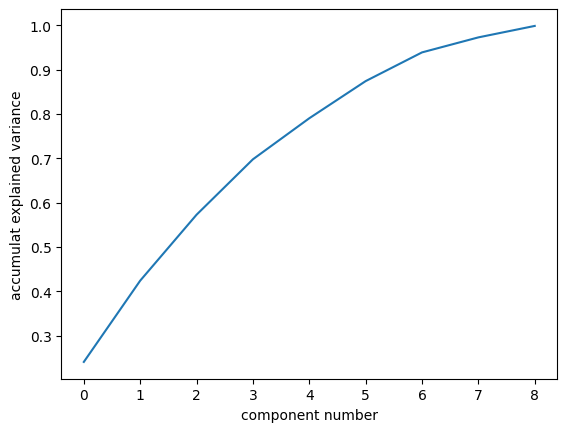

In [569]:
explained_variance = []
for i in range(1, 10):
    pca = make_pipeline(StandardScaler(), PCA(n_components=i))
    pca.fit(X)
    explained_variance.append(sum(pca['pca'].explained_variance_ratio_))
plt.plot(range(len(explained_variance)),explained_variance)
plt.xlabel('component number')
plt.ylabel('accumulat explained variance')

In [570]:
i = 6
pca = make_pipeline(StandardScaler(), PCA(n_components=i))
pca.fit(X)
columns = [f"PCA{i}"for i in range(i)] + dropCol

In [571]:
sum(pca['pca'].explained_variance_ratio_)

0.8739809039541033

In [572]:
pcaDf = pd.DataFrame(np.hstack((pca.transform(X),np.array(TrainTestDf[dropCol]))),columns=columns)

In [573]:
pcaDf.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,T1,T2,T3,T4,T5
0,0.412495,-0.555574,-0.533669,-0.460796,0.638350,0.447998,NaN,NaN,NaN,NaN,NaN
1,-1.989991,0.659315,-1.559188,0.549838,2.412329,1.765250,NaN,NaN,NaN,NaN,NaN
2,-0.015815,0.556648,2.707671,-0.896789,-1.669576,1.965493,NaN,NaN,NaN,NaN,NaN
3,-2.225254,-0.807759,-0.680943,1.076697,-1.886049,-0.916733,NaN,NaN,NaN,NaN,NaN
4,1.622357,-0.952317,-0.851095,-0.711775,0.234428,-0.406228,1.0,1.0,1.0,0.0,0.0


In [574]:
pcaDf.to_csv("pcaDf.csv")